In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import binary_crossentropy

In [3]:
X = pd.read_csv('/content/gdrive/MyDrive/X100.csv')
X = X.drop(columns = [X.columns[0]])
X = np.array(X)
rows = X.shape[0]
X = np.reshape(X, (rows, 100, 100, 1))
print(X.shape)

(3227, 100, 100, 1)


In [4]:
y = pd.read_csv('/content/gdrive/MyDrive/y100.csv')
y = y.drop(columns = [y.columns[0]])
y = np.array(y)
y = np.reshape(y, (rows, 1))
print(y.shape)

(3227, 1)


In [5]:
X, y = shuffle(X, y, random_state = 0)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = 2)

In [8]:
print(X_train.shape, X_val.shape, X_test.shape)

(2330, 100, 100, 1) (412, 100, 100, 1) (485, 100, 100, 1)


[0]


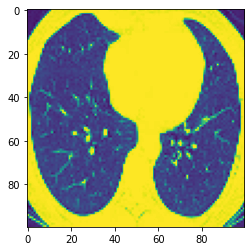

In [9]:
arr = X_train[1]
arr = np.reshape(arr, (100, 100))
plt.imshow(arr)
print(y_train[1])

In [10]:
mean = np.mean(X_train)
deviation = np.std(X_train)
X_train = (X_train - mean) / deviation

In [11]:
X_val = (X_val - mean) / deviation

In [12]:
model = keras.models.Sequential()

model.add(Conv2D(64, (3, 3), 1, 'same', activation = 'relu', input_shape = (100, 100, 1)))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), 1, 'same', activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), 1, 'same', activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.30))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      640       
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 256)       2

In [13]:
model.compile(optimizer = Adam(lr = 1e-3), loss = binary_crossentropy, metrics = ['accuracy'])
hist = model.fit(X_train, y_train, epochs = 20, validation_data = (X_val, y_val), verbose = 1)

Epoch 1/20
73/73 [==============================] - 37s 52ms/step - loss: 0.8107 - accuracy: 0.5342 - val_loss: 0.6331 - val_accuracy: 0.6869
Epoch 2/20
73/73 [==============================] - 3s 37ms/step - loss: 0.5911 - accuracy: 0.7044 - val_loss: 0.5737 - val_accuracy: 0.7112
Epoch 3/20
73/73 [==============================] - 3s 37ms/step - loss: 0.5072 - accuracy: 0.7578 - val_loss: 0.5519 - val_accuracy: 0.7330
Epoch 4/20
73/73 [==============================] - 3s 37ms/step - loss: 0.4486 - accuracy: 0.7995 - val_loss: 0.4971 - val_accuracy: 0.7791
Epoch 5/20
73/73 [==============================] - 3s 37ms/step - loss: 0.4099 - accuracy: 0.8230 - val_loss: 0.4144 - val_accuracy: 0.8398
Epoch 6/20
73/73 [==============================] - 3s 37ms/step - loss: 0.3612 - accuracy: 0.8340 - val_loss: 0.4007 - val_accuracy: 0.8325
Epoch 7/20
73/73 [==============================] - 3s 37ms/step - loss: 0.3041 - accuracy: 0.8689 - val_loss: 0.3734 - val_accuracy: 0.8519
Epoch 8/20
7

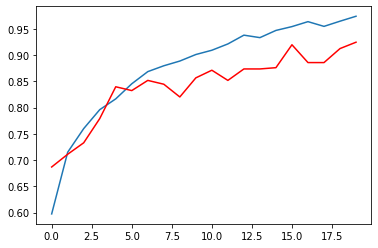

In [14]:
plt.plot(hist.history['accuracy'], label = 'Training accuracy')
plt.plot(hist.history['val_accuracy'], color = 'r', label = 'Validation accuracy')

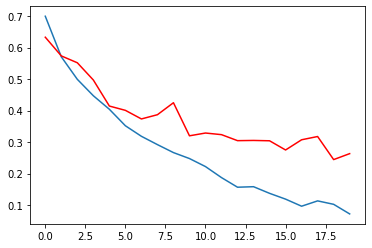

In [15]:
plt.plot(hist.history['loss'], label = 'Training loss')
plt.plot(hist.history['val_loss'], color = 'r', label = 'Validation loss')

In [16]:
X_test = (X_test - mean) / deviation

In [17]:
model.evaluate(X_test, y_test, verbose = 1)

16/16 [==============================] - 0s 18ms/step - loss: 0.2469 - accuracy: 0.9196


[0.2468581646680832, 0.9195876121520996]

In [19]:
predicted = model.predict(x = X_test, verbose = 1)

16/16 [==============================] - 0s 11ms/step


In [20]:
ct = 0
for i in range(X_test.shape[0]):
  data = X_test[i]
  img = np.reshape(data, (100, 100, 1))
  if predicted[i] >= 0.5:
    g = 1
  else: 
    g = 0
  if y_test[i] != g:
    ct += 1
print(ct)

39
